# 📌 **Extracão**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


# **🔧 Transformação**

In [ ]:
colunas = ['customer','phone','internet','account']
colunas_normalizadas = []

for col in colunas:
  col_normal = pd.json_normalize(df[col], sep='_')
  colunas_normalizadas.append(col_normal)

dados = pd.concat([
    df[['customerID', 'Churn']],
    *colunas_normalizadas
], axis=1)

dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
print('Numero de duplicados', dados.duplicated().sum())

Numero de duplicados 0


In [ ]:
print(dados.isna().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


In [ ]:
(dados.apply(lambda x: x.str.strip() == '' if x.dtype == 'object' else False).fillna(False) | dados.isna()).sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
dados[dados['Churn'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [ ]:
dados[dados['Charges_Total'].str.strip() == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [ ]:
dados['Charges_Total'] = pd.to_numeric(dados['Charges_Total'], errors='coerce')
print(dados['Charges_Total'].dtype)

float64


In [ ]:
len(dados)

7267

In [ ]:
dados = dados[dados['Churn'].str.strip() != '']

In [ ]:
len(dados)

7043

In [ ]:
for col in dados.columns:
  print(f'Valores únicos na coluna "{col}": {dados[col].nunique()}')
  if dados[col].nunique() < 50:
    print(dados[col].unique())
    print('-' *50)

Valores únicos na coluna "customerID": 7043
Valores únicos na coluna "Churn": 2
['No' 'Yes']
--------------------------------------------------
Valores únicos na coluna "gender": 2
['Female' 'Male']
--------------------------------------------------
Valores únicos na coluna "SeniorCitizen": 2
[0 1]
--------------------------------------------------
Valores únicos na coluna "Partner": 2
['Yes' 'No']
--------------------------------------------------
Valores únicos na coluna "Dependents": 2
['Yes' 'No']
--------------------------------------------------
Valores únicos na coluna "tenure": 73
Valores únicos na coluna "PhoneService": 2
['Yes' 'No']
--------------------------------------------------
Valores únicos na coluna "MultipleLines": 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos na coluna "InternetService": 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Valores únicos na coluna "OnlineSecurity": 3
[

In [ ]:
dados['Daily_cost'] = round(dados['Charges_Total'] /
                            dados['tenure'] / 30, 2)

In [ ]:
dados[['Charges_Total','tenure','Daily_cost']]

,Charges_Total,tenure,Daily_cost
0,593.30,9,2.20
1,542.40,9,2.01
2,280.85,4,2.34
3,1237.85,13,3.17
4,267.40,3,2.97
...,...,...,...
7262,742.90,13,1.90
7263,1873.70,22,2.84
7264,92.75,2,1.55
7265,4627.65,67,2.30


In [ ]:
Colunas_binarias = ['Churn', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

for col in Colunas_binarias:
    dados[col] = dados[col].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

/tmp/ipython-input-4153078034.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[col] = dados[col].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


In [ ]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Daily_cost
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


In [ ]:
for col in dados.columns:
  print(f'Valores únicos na coluna "{col}": {dados[col].nunique()}')
  if dados[col].nunique() < 50:
    print(dados[col].unique())
    print('-' *50)

Valores únicos na coluna "customerID": 7043
Valores únicos na coluna "Churn": 2
[0 1]
--------------------------------------------------
Valores únicos na coluna "gender": 2
['Female' 'Male']
--------------------------------------------------
Valores únicos na coluna "SeniorCitizen": 2
[0 1]
--------------------------------------------------
Valores únicos na coluna "Partner": 2
[1 0]
--------------------------------------------------
Valores únicos na coluna "Dependents": 2
[1 0]
--------------------------------------------------
Valores únicos na coluna "tenure": 73
Valores únicos na coluna "PhoneService": 2
[1 0]
--------------------------------------------------
Valores únicos na coluna "MultipleLines": 3
[0 1 'No phone service']
--------------------------------------------------
Valores únicos na coluna "InternetService": 3
['DSL' 'Fiber optic' 0]
--------------------------------------------------
Valores únicos na coluna "OnlineSecurity": 3
[0 1 'No internet service']
-----------

#📊 **Carga** **e** **análise**

In [ ]:
dados.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total,Daily_cost
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7032.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.159879
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.006217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.460000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.207500
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,3.010000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,4.050000


In [ ]:
cores = ['#87CEEB', '#FFC0CB']

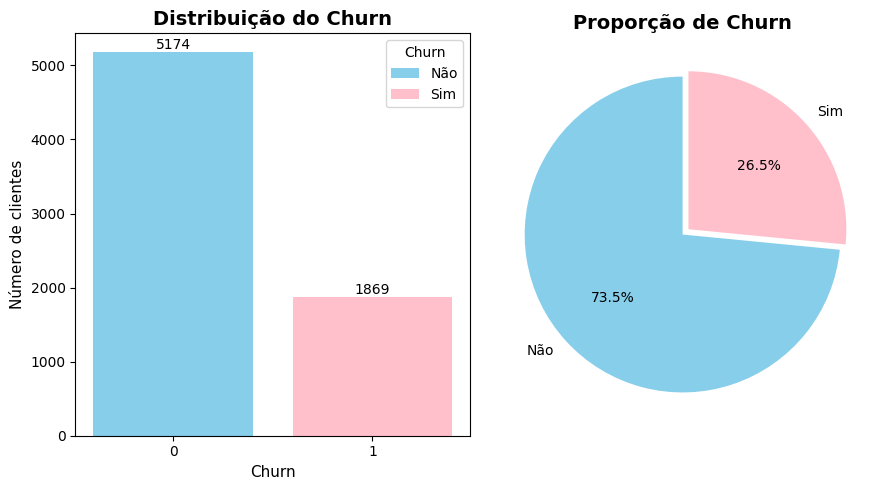

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(9,5))

churn_counts = dados['Churn'].value_counts().sort_index()
cores = sns.color_palette(palette=cores)

bars = axs[0].bar(churn_counts.index.astype(str), churn_counts.values, color=cores)

for i, bar in enumerate(bars):
    bar.set_label(['Não', 'Sim'][i])

axs[0].set_title('Distribuição do Churn', fontsize=14, weight='bold')
axs[0].set_xlabel('Churn', fontsize=11)
axs[0].set_ylabel('Número de clientes', fontsize=11)
axs[0].set_xticks([0,1])
axs[0].legend(title='Churn')

for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=10)


#Gráfico de Pizza
labels = ['Não', 'Sim']
axs[1].pie(churn_counts.values, labels=labels,
       autopct='%1.1f%%',
       startangle=90,
       colors=cores,
       explode=(0, 0.05))

axs[1].set_title('Proporção de Churn', fontsize=14, weight='bold')

plt.tight_layout()
fig.savefig('churn_distribuicao.png', bbox_inches='tight', dpi=300)
plt.show()

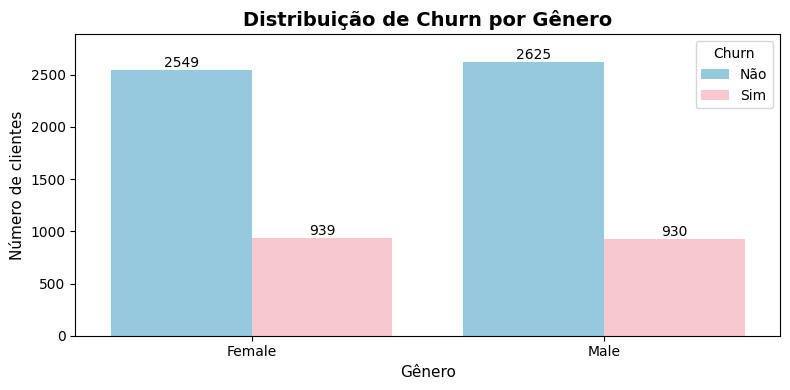

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=dados, x='gender', hue='Churn', ax=ax, palette=cores)

ax.set_title('Distribuição de Churn por Gênero', fontsize=14, weight='bold')
ax.set_xlabel('Gênero', fontsize=11)
ax.set_ylabel('Número de clientes',fontsize=11)
ax.legend(title='Churn', labels=['Não', 'Sim'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

ax.margins(y=0.1)

plt.tight_layout()
fig.savefig('churn_genero.png', bbox_inches='tight', dpi=300)
plt.show()

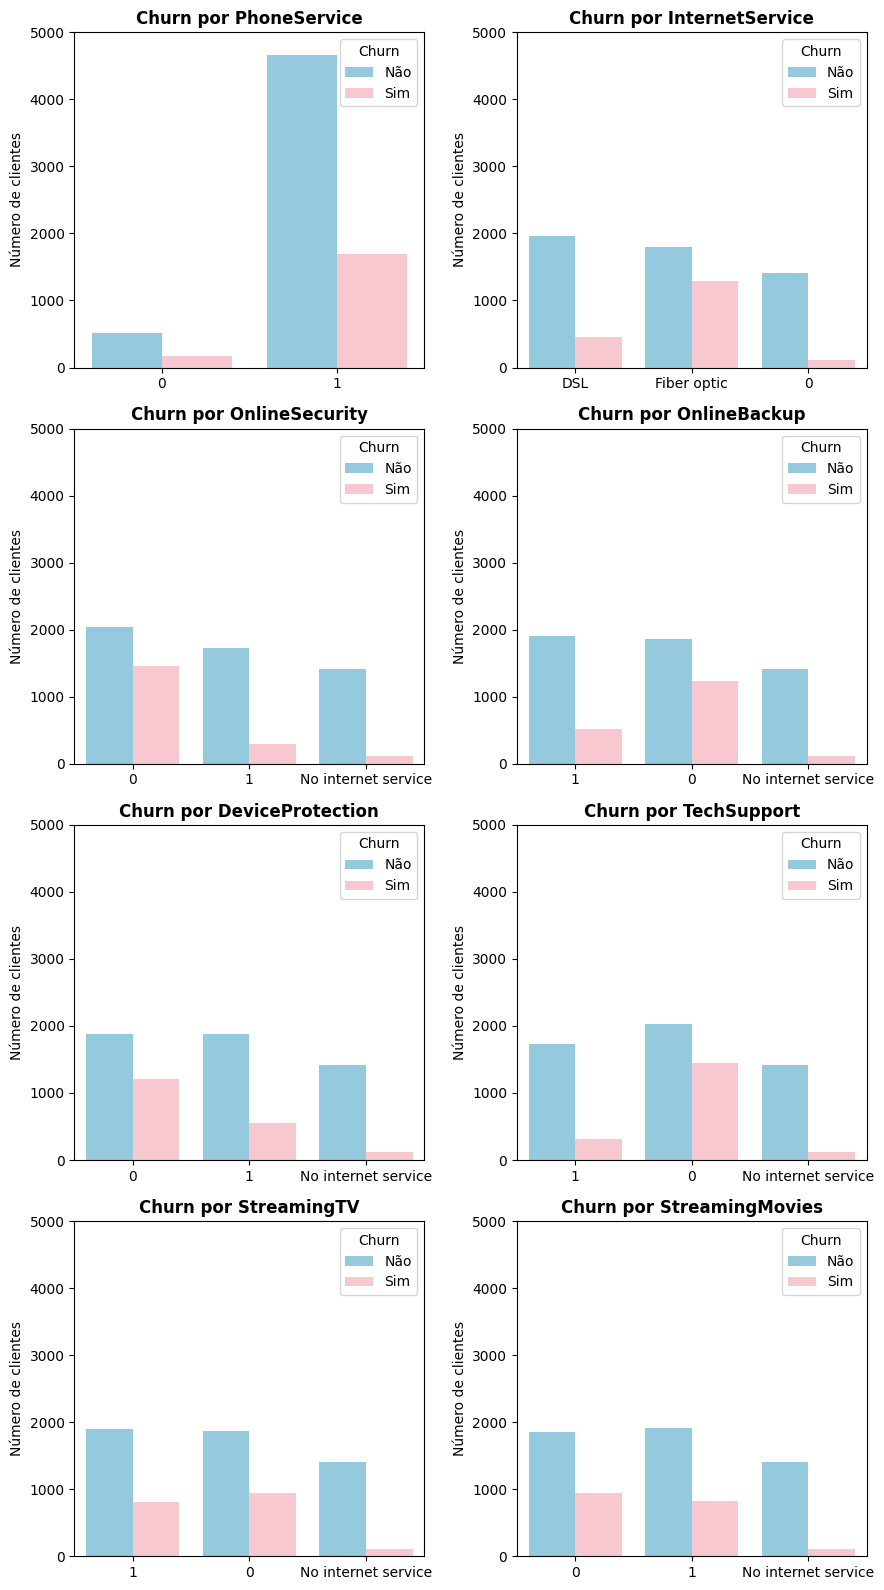

In [ ]:
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Tamanho do grid
ncols = 2
nrows = -(-len(services) // ncols)  # arredonda pra cima

plt.figure(figsize=(9, nrows * 4))
for i, service in enumerate(services, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(x=service, hue='Churn', data=dados, palette=cores)
    plt.title(f'Churn por {service}', fontsize=12, weight='bold')
    plt.xlabel('')
    plt.ylabel('Número de clientes')
    plt.ylim(0,5000)
    plt.legend(title='Churn', labels=['Não', 'Sim'])

plt.tight_layout()
plt.savefig('churn_servicos_contratados.png', bbox_inches='tight', dpi=300)
plt.show()

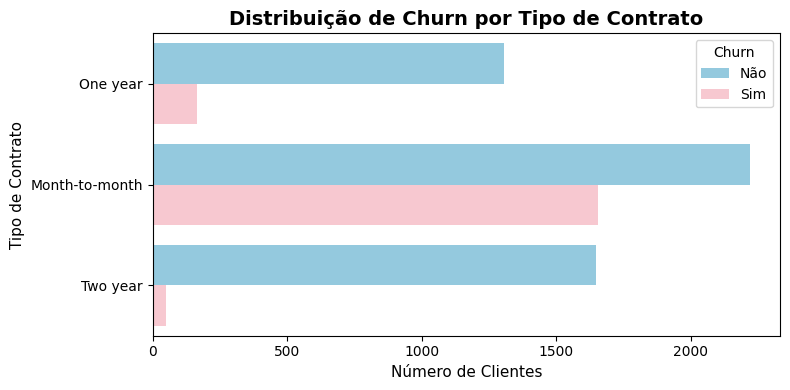

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=dados, y='Contract', hue='Churn', ax=ax, palette=cores)

ax.set_title('Distribuição de Churn por Tipo de Contrato',fontsize=14, weight='bold')
ax.set_xlabel('Número de Clientes',fontsize=11)
ax.set_ylabel('Tipo de Contrato',fontsize=11)
ax.legend(title='Churn', labels=['Não', 'Sim'])

plt.tight_layout()
fig.savefig('churn_tipo_contrato.png', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-1770052380.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Jovem/Adulto', 'Idoso'])


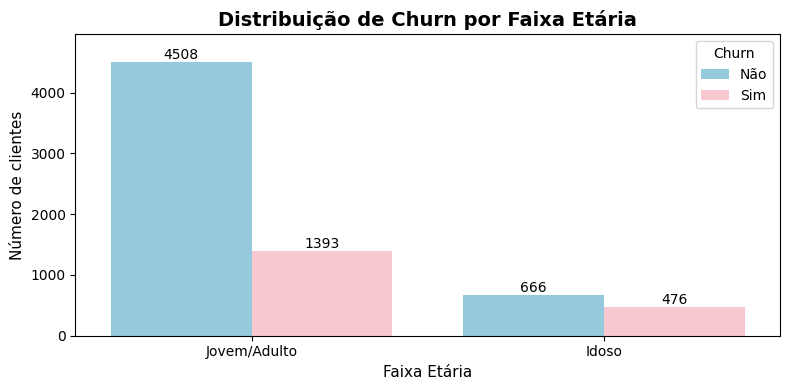

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=dados, x='SeniorCitizen', hue='Churn', ax=ax, palette=cores)

ax.set_title('Distribuição de Churn por Faixa Etária',fontsize=14,weight='bold')
ax.set_xlabel('Faixa Etária',fontsize=11)
ax.set_ylabel('Número de clientes',fontsize=11)
ax.set_xticklabels(['Jovem/Adulto', 'Idoso'])
ax.legend(title='Churn', labels=['Não', 'Sim'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

ax.margins(y=0.1)
plt.tight_layout()
fig.savefig('churn_faixa_etaria.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
pd.crosstab(dados['SeniorCitizen'], dados['Churn'], normalize='index').round(2) * 100

Churn,0,1
SeniorCitizen,,
0,76.0,24.0
1,58.0,42.0


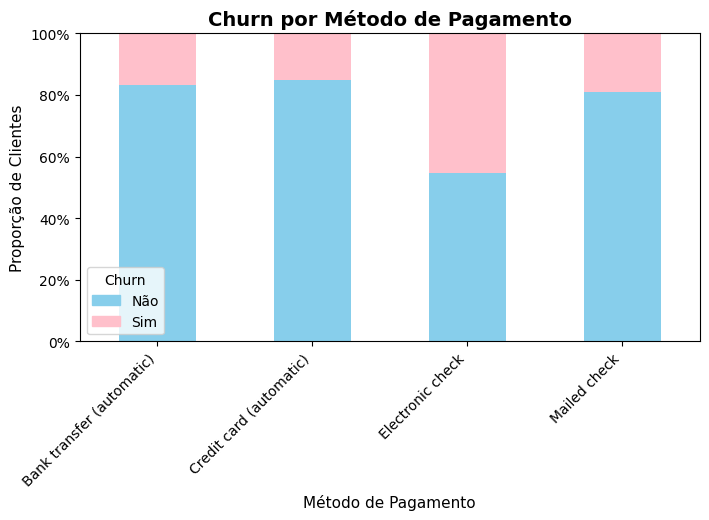

In [ ]:
tabela = dados.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
proporcoes = tabela.div(tabela.sum(axis=1), axis=0)

ax = proporcoes.plot(kind='bar', stacked=True, figsize=(8,4), color=cores)

ax.set_title('Churn por Método de Pagamento', fontsize=14, weight='bold')
ax.set_xlabel('Método de Pagamento', fontsize=11)
ax.set_ylabel('Proporção de Clientes', fontsize=11)
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

from matplotlib.patches import Patch
custom_legend = [Patch(color=cores[0], label='Não'), Patch(color=cores[1], label='Sim')]
ax.legend(handles=custom_legend, title='Churn')

plt.xticks(rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig('churn_metodo_pagamento.png', bbox_inches='tight', dpi=300)
plt.show()

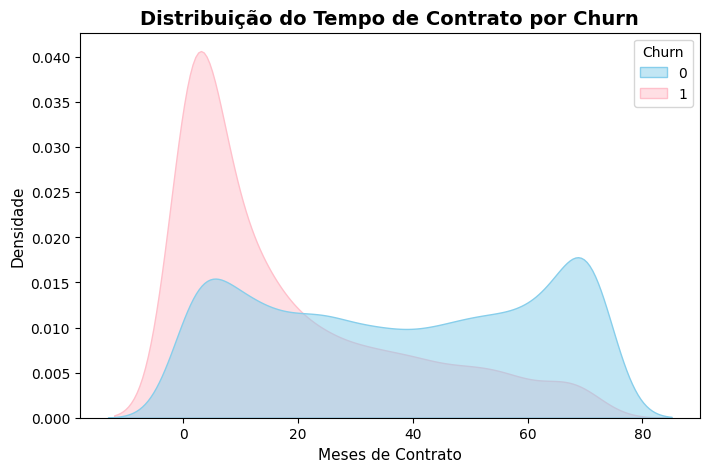

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=dados, x='tenure', hue='Churn', fill=True, palette=cores, ax=ax, common_norm=False, alpha=0.5)
ax.set_title('Distribuição do Tempo de Contrato por Churn',fontsize=14,weight='bold')
ax.set_xlabel('Meses de Contrato',fontsize=11)
ax.set_ylabel('Densidade',fontsize=11)

fig.savefig('churn_tempo_contrato.png', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-3129229333.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Churn', y='Charges_Monthly', palette=cores)


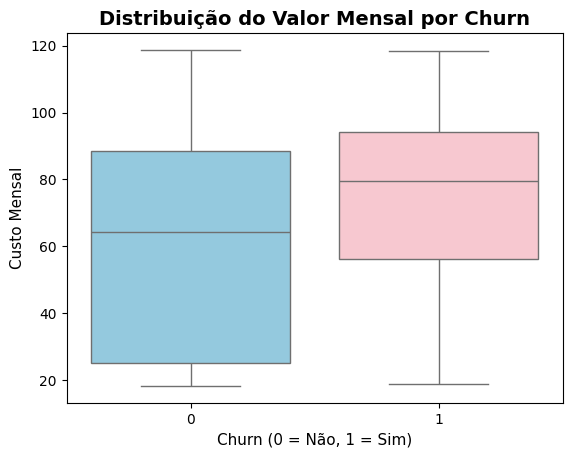

In [ ]:
sns.boxplot(data=dados, x='Churn', y='Charges_Monthly', palette=cores)
plt.title('Distribuição do Valor Mensal por Churn',fontsize=14,weight='bold')
plt.xlabel('Churn (0 = Não, 1 = Sim)',fontsize=11)
plt.ylabel('Custo Mensal',fontsize=11)

plt.savefig('churn_custo_mensal.png', bbox_inches='tight', dpi=300)
plt.show()

# **📄Relatorio Final**

**1. Introdução**

A análise teve como foco compreender o comportamento dos clientes da Telecom X e identificar padrões associados ao churn. O objetivo foi propor estratégias baseadas em dados para reduzir a evasão e melhorar a retenção.

**2. Limpeza e Tratamento de Dados**

Os dados foram extraídos em formato JSON, exigindo normalização das colunas aninhadas. Linhas com churn ausente (224) foram removidas, e valores nulos em TotalCharges foram identificados como clientes novos. Criou-se a coluna daily_cost e padronizaram-se variáveis binárias para facilitar as análises.

**3. Análise Exploratória de Dados**

* Churn por Gênero: Não há diferença significativa entre homens e
mulheres.

* Churn por Serviços Contratados: Clientes sem serviços adicionais tendem a sair mais.

* Churn por Tipo de Contrato: Contratos mensais têm maior evasão; contratos longos retêm mais clientes.

* Churn por Faixa Etária: Idosos apresentam churn mais alto (42%) que jovens (24%).

* Churn por Método de Pagamento: Electronic Check apresenta maior churn; métodos automáticos têm menor evasão.

* Tempo de Contrato: A evasão é maior nos primeiros meses e diminui com o tempo.

* Custo Mensal: Clientes que saem pagam valores mensais mais altos.

**4. Conclusão**

O churn é influenciado por tipo de contrato, adesão a serviços adicionais, tempo de permanência, valor do plano e método de pagamento. Planos longos, serviços agregados e pagamentos automáticos estão ligados a menor evasão.

**5. Recomendações**

* Incentivar contratos anuais/bianuais com benefícios extras;

* Oferecer pacotes com serviços como segurança online, backup e suporte técnico;

* Criar estratégias de retenção focadas nos primeiros meses de contrato, e

* Estimular pagamentos automáticos para reduzir churn relacionado a inadimplência.